**Ameya Dehade**

In [79]:
import pandas as pd
import yfinance
from datetime import datetime

df = pd.read_csv('IBOVDia_03-04-24.csv')
tickers = df['Code'].values
tickers
START_DATE = '2019-02-01'
TRUNCATE_DATE = '2020-02-01'
END_DATE = '2024-02-01'

In [80]:
# Use the datetime function to assign the date Feb 1, 2010 to a datetime object called "startDate".
startDate = datetime.fromisoformat(START_DATE) #starts 2020

In [81]:
# Use the datetime function to assign the date Feb 1, 2024 to a datetime object called "endDate".
endDate = datetime.fromisoformat(END_DATE)

In [82]:
# Format the list of symbols properly
end = len(tickers) - 2
mySymbols = [s + '.SA' for s in tickers[:end]]

In [83]:
yahooDataFrame = yfinance.download(mySymbols, startDate, endDate)

[*********************100%%**********************]  86 of 86 completed


In [84]:
print(type(yahooDataFrame))
print(yahooDataFrame.shape)
yahooDataFrame

<class 'pandas.core.frame.DataFrame'>
(1242, 516)


Price       Adj Close                                                       \
Ticker       ABEV3.SA   ALOS3.SA   ALPA4.SA   ARZZ3.SA ASAI3.SA   AZUL4.SA   
Date                                                                         
2019-02-01  14.866415        NaN  15.897583  50.284065      NaN  37.200001   
2019-02-04  15.145520        NaN  16.055452  50.510166      NaN  38.040001   
2019-02-05  15.301490        NaN  16.244898  49.813786      NaN  38.590000   
2019-02-06  14.849998        NaN  15.747605  47.534721      NaN  37.299999   
2019-02-07  15.391788        NaN  15.589734  46.910690      NaN  36.180000   
...               ...        ...        ...        ...      ...        ...   
2024-01-25  13.200000  24.690001   8.790000  57.250000    14.00  14.070000   
2024-01-26  13.200000  24.620001   8.670000  57.910000    13.80  14.270000   
2024-01-29  13.250000  24.309999   8.440000  57.000000    14.46  13.840000   
2024-01-30  13.040000  24.070000   8.330000  55.840000    14.05  13.200000   
2024-01-31  13.080000  24.549999   8.580000  62.590000    13.66  13.400000   

Price                                                   ...   Volume           \
Ticker       B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ... TOTS3.SA TRPL4.SA   
Date                                                    ...                     
2019-02-01   8.890698  37.645588  19.300194  21.816380  ...   709581  1550800   
2019-02-04   8.982553  38.360790  19.721142  22.299269  ...  1374870  1212800   
2019-02-05   9.180185  39.480545  19.706583  22.309034  ...  3302341  1213200   
2019-02-06   8.963066  37.074867  18.769794  21.259262  ...  2654829  1014000   
2019-02-07   8.629041  37.320496  19.041607  21.581514  ...  2984159   676000   
...               ...        ...        ...        ...  ...      ...      ...   
2024-01-25  13.359532  55.962761  13.663766  15.319881  ...  1434500  1074100   
2024-01-26  13.150634  56.348503  13.713634  15.479464  ...  1378000  1054300   
2024-01-29  13.140686  55.903412  13.663766  15.339829  ...  2758800   730300   
2024-01-30  12.931788  55.616577  13.603925  15.230117  ...  1959800  2361300   
2024-01-31  13.021317  55.834175  13.643819  15.309908  ...  3297400  1723500   

Price                                                                   \
Ticker      UGPA3.SA  USIM5.SA  VALE3.SA   VAMO3.SA  VBBR3.SA VIVT3.SA   
Date                                                                     
2019-02-01  11129404  17225600  21286700        NaN   4989800    23700   
2019-02-04   9317479  13117500  35888900        NaN   3283500    18500   
2019-02-05   7408316  12865000  21992300        NaN   1858200     9700   
2019-02-06   8496600  16846300  29257400        NaN   4219900    98900   
2019-02-07   9255403  21334400  31403200        NaN   6481400    94300   
...              ...       ...       ...        ...       ...      ...   
2024-01-25   3488300   9677700  47637000  3591300.0   3221500  1062000   
2024-01-26   3700900  33917500  27397200  5075500.0   2512100  1271800   
2024-01-29   2873900  10409400  15866100  4173900.0   2219300  1032500   
2024-01-30   9390100   7991600  34371300  6264700.0   6203400  2004500   
2024-01-31   4774100  10581600  34753400  8966100.0  14624000  2163300   

Price                         
Ticker     WEGE3.SA YDUQ3.SA  
Date                          
2019-02-01  8556200  3939600  
2019-02-04  6665400  5120600  
2019-02-05  5926200  4424500  
2019-02-06  6501600  2753800  
2019-02-07  5674600  3496400  
...             ...      ...  
2024-01-25  4835300  3916100  
2024-01-26  3828900  3254600  
2024-01-29  4135300  2099600  
2024-01-30  4833100  5461200  
2024-01-31  6014500  5733400  

[1242 rows x 516 columns]

In [85]:
# Select the columns of adjusted close prices and assign it to "priceTable".
priceTable = yahooDataFrame['Adj Close']

In [86]:
print(type(priceTable))
print(priceTable.shape)
# Expected shape should be (3476, 86) if data is collected from 2010-2024.

<class 'pandas.core.frame.DataFrame'>
(1242, 86)


<Axes: xlabel='Date'>

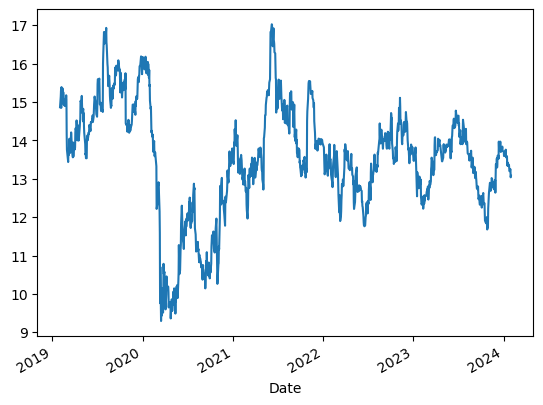

In [87]:
import matplotlib.pyplot as plt

abev = priceTable['ABEV3.SA']
abev.plot()

In [88]:
rtn = priceTable.pct_change()*100
rtn_prev = rtn.shift(periods = 1)
df_5d_rolling = rtn_prev.rolling(5).sum()
df_5d_rolling.dropna(inplace=True, how='all')
df_5d_rolling.head()

Ticker,ABEV3.SA,ALOS3.SA,ALPA4.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-11,0.778341,NaN,-1.536316,-5.795199,NaN,-0.375161,-1.793940,-0.476470,1.401763,0.130794,...,-2.473399,-0.924370,-3.602326,-0.589221,-6.653879,NaN,-5.601205,-1.846853,-3.173706,-3.553581
2019-02-12,1.590267,NaN,-3.841166,-7.752500,NaN,-2.092684,-4.582598,-5.333990,-2.717200,-2.664639,...,-2.979859,-0.557733,-5.123460,-1.933813,-5.900599,NaN,-4.592302,-1.644823,-4.109252,-1.074133
2019-02-13,0.346676,NaN,-3.487370,-6.431923,NaN,-0.689072,-5.678152,-2.097582,-0.489840,-0.704437,...,-8.812282,-1.404144,-5.882870,-2.138313,-0.116519,NaN,-5.426227,-1.930879,-5.991782,-0.196367
2019-02-14,1.797580,NaN,-0.828956,-1.430231,NaN,3.019691,-3.570101,1.725139,3.420614,2.455907,...,-5.765718,0.505903,1.140091,2.871051,7.196845,NaN,2.253014,4.184402,-3.563458,5.623316
2019-02-15,-0.763280,NaN,0.021878,1.214602,NaN,6.543194,4.409124,6.170163,5.374137,4.751767,...,-0.347267,1.650977,3.852714,2.428258,9.619548,NaN,6.004100,0.814596,-1.719909,9.178970


In [89]:
mom_sig_raw = rtn.shift(22).rolling(231).sum().dropna(how='all')
mom_sig_mean = mom_sig_raw.mean(axis = 1)
mom_sig_std = mom_sig_raw.std(axis = 1)
mom_sig_norm = mom_sig_raw.sub(mom_sig_mean, axis = 0).div(mom_sig_std, axis = 0)

In [90]:
mom_rtn = (mom_sig_norm/(574-1) * rtn).sum(axis=1)
mom_rtn_mean = mom_rtn.mean() * 252     
mom_rtn_std = mom_rtn.std() * 252**0.5
mom_SR = mom_rtn_mean / mom_rtn_std
print(mom_rtn_mean, mom_rtn_std, mom_SR)

0.6244512019029541 1.2080229557532651 0.5169199798141056


In [91]:
mr_sig_raw = - df_5d_rolling
mr_sig_mean = mr_sig_raw.mean(axis = 1)
mr_sig_std = mr_sig_raw.std(axis = 1)
mr_sig_norm = mr_sig_raw.sub(mr_sig_mean, axis = 0).div(mr_sig_std, axis = 0)
mr_sig_raw.head()

Ticker,ABEV3.SA,ALOS3.SA,ALPA4.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-11,-0.778341,NaN,1.536316,5.795199,NaN,0.375161,1.793940,0.476470,-1.401763,-0.130794,...,2.473399,0.924370,3.602326,0.589221,6.653879,NaN,5.601205,1.846853,3.173706,3.553581
2019-02-12,-1.590267,NaN,3.841166,7.752500,NaN,2.092684,4.582598,5.333990,2.717200,2.664639,...,2.979859,0.557733,5.123460,1.933813,5.900599,NaN,4.592302,1.644823,4.109252,1.074133
2019-02-13,-0.346676,NaN,3.487370,6.431923,NaN,0.689072,5.678152,2.097582,0.489840,0.704437,...,8.812282,1.404144,5.882870,2.138313,0.116519,NaN,5.426227,1.930879,5.991782,0.196367
2019-02-14,-1.797580,NaN,0.828956,1.430231,NaN,-3.019691,3.570101,-1.725139,-3.420614,-2.455907,...,5.765718,-0.505903,-1.140091,-2.871051,-7.196845,NaN,-2.253014,-4.184402,3.563458,-5.623316
2019-02-15,0.763280,NaN,-0.021878,-1.214602,NaN,-6.543194,-4.409124,-6.170163,-5.374137,-4.751767,...,0.347267,-1.650977,-3.852714,-2.428258,-9.619548,NaN,-6.004100,-0.814596,1.719909,-9.178970


In [96]:
mr_rtn = (mr_sig_norm/(574-1) * rtn).truncate(before=TRUNCATE_DATE).sum(axis=1) #starts 2020
mr_rtn_mean = mr_rtn.mean() * 252
mr_rtn_std = mr_rtn.std() * (252**0.5)
mr_SR = mr_rtn_mean / mr_rtn_std
print(mr_rtn_mean, mr_rtn_std, mr_SR)

-0.06776989382229127 1.3663648092438727 -0.049598682111693285


In [97]:
both_rtn = 0.5*mom_rtn + 0.5*mr_rtn  # This is the return of a 50/50 portfolio of both strategies.
both_rtn_mean = both_rtn.mean() * 252
both_rtn_std = both_rtn.std() * 252**0.5
both_SR = both_rtn_mean / both_rtn_std
print(both_rtn_mean, both_rtn_std, both_SR)

0.3566328742184962 0.9536113878142953 0.3739813500297107


<Axes: xlabel='Date'>

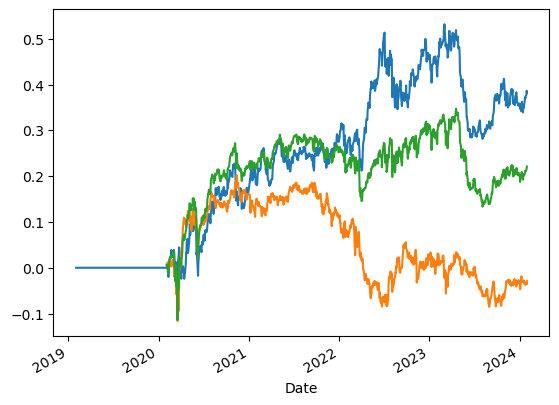

In [99]:
plt.figure()
(mom_rtn.cumsum()/mom_rtn_std*0.15).plot() # Blue
(mr_rtn.cumsum()/mr_rtn_std*0.15).plot() # Orange
(both_rtn.cumsum()/both_rtn_std*0.15).plot() # Green

In [100]:
df_factors = pd.concat([mom_rtn, mr_rtn], axis=1)
df_factors.columns = ['mom', 'mr']
corr_matrix = df_factors.corr()
corr_matrix

,mom,mr
mom,1.000000,-0.014786
mr,-0.014786,1.000000


### Continue Here: Implement Turtle Trading on this data. Compare with momentum and mean reversion
### Possibly find an optimal combination of the 3???
### work on adding constraints -- this time i tried ATR for stop loss?



In [101]:
from pandas_datareader import data as pdr 
yfinance.pdr_override() 

import numpy as np
import pandas_datareader as pdr



In [102]:
# import pandas_datareader as pdr
# def calculate_atr(stock_data, period=14): #set for 2 weeks

#     """
#     calculate atr for a given stock data and period.
#     :param stock_data: DataFrame, the historical stock data containing 'High', 'Low', and 'Close' columns.
#     :param period: int, the period over which to calculate the ATR.
#     :return: DataFrame, the input DataFrame with an additional column 'ATR' containing the ATR values.
#     """
#     # calculate true range
#     stock_data['high-low'] = stock_data['High'] - stock_data['Low']
#     stock_data['high-close_prev'] = np.abs(stock_data['High'] - stock_data['Close'].shift(1))
#     stock_data['low-close_prev'] = np.abs(stock_data['Low'] - stock_data['Close'].shift(1))
#     stock_data['TR'] = stock_data[['high-low', 'high-close_prev', 'low-close_prev']].max(axis=1)

#     # calculate average
#     stock_data['ATR'] = stock_data['TR'].rolling(window=period).mean()
    
#     stock_data.drop(['high-low', 'high-close_prev', 'low-close_prev', 'TR'], axis=1, inplace=True)
#     return stock_data
def calculate_atr(stock_data, period=14):
    high_low = stock_data['High'] - stock_data['Low']
    high_close = np.abs(stock_data['High'] - stock_data['Close'].shift())
    low_close = np.abs(stock_data['Low'] - stock_data['Close'].shift())
    tr = pd.DataFrame({'high_low': high_low, 'high_close': high_close, 'low_close': low_close}).max(axis=1)
    atr = tr.rolling(window=period).mean()
    return atr

In [103]:
# # def turtle(stock_ticker):
# #     stock = pdr.get_data_yahoo(stock_ticker, start='2010-02-01', end="2024-03-01")
# # #     if stock.empty: 
# # #         return pd.Series([0])  # this is wrong lmao
        
# #     stock['high'] = stock.Close.shift(1).rolling(window=5).max() #5 day high
# #     stock['low'] = stock.Close.shift(1).rolling(window=5).min() #low
# #     stock['avg'] = stock.Close.shift(1).rolling(window=5).mean() #mean
    
# #     #rules for entry/exit
# #     stock['long_entry'] = stock.Close > stock.high
# #     stock['short_entry'] = stock.Close < stock.low
# #     stock['long_exit'] = stock.Close < stock.avg
# #     stock['short_exit'] = stock.Close > stock.avg
    
# #     stock['positions_long'] = np.nan 
# #     stock.loc[stock.long_entry,'positions_long']= 1 
# #     stock.loc[stock.long_exit,'positions_long']= 0 

# #     stock['positions_short'] = np.nan 
# #     stock.loc[stock.short_entry,'positions_short']= 0
# #     stock.loc[stock.short_exit,'positions_short']= 0 

# #     stock['Signal'] = stock.positions_long + stock.positions_short 

# #     # Initialize positions and signals
# #     stock['positions_long'] = stock['positions_long'].fillna(0) 
# #     stock['positions_short'] = stock['positions_short'].fillna(0)
# #     stock['Signal'] = stock.positions_long + stock.positions_short 
# #     stock['Signal'] = stock['Signal'].fillna(method='ffill')

# #     # Calculate daily log returns
# #     daily_log_returns = np.log(stock.Close / stock.Close.shift(1))
# #     # Replace NaN with 0 for the days with no trading activity
# #     daily_log_returns.fillna(0, inplace=True)
# #     # Account for the signal
# #     daily_log_returns = daily_log_returns * stock.Signal.shift(1).fillna(0)
    
# #     # Return the cumulative sum of daily log returns
# #     return daily_log_returns.cumsum()




# #ATR TURTLE
# def turtle(stock_ticker):
#     stock = pdr.get_data_yahoo(stock_ticker, start='2020-02-01', end="2024-03-01")
#     stock['high'] = stock.Close.shift(1).rolling(window=5).max() #5 day high
#     stock['low'] = stock.Close.shift(1).rolling(window=5).min() #low
#     stock['avg'] = stock.Close.shift(1).rolling(window=5).mean() #mean
    
#     #ATR!!!!
#     stock['ATR']=calculate_atr(stock,14) #let atr data be 14 days?
    
#     #og turtle
#     stock['high'] = stock['Close'].shift(1).rolling(window=5).max()  # 5 day high
#     stock['low'] = stock['Close'].shift(1).rolling(window=5).min()   # 5 day low
#     stock['avg'] = stock['Close'].shift(1).rolling(window=5).mean()  # 5 day mean
    
#     stock['long_entry'] = stock['Close'] > stock['high']
#     stock['short_entry'] = stock['Close'] < stock['low']
#     stock['long_exit'] = stock['Close'] < stock['avg']
#     stock['short_exit'] = stock['Close'] > stock['avg']

#     stock['positions_long'] = np.nan
#     stock.loc[stock['long_entry'], 'positions_long'] = 1
#     stock.loc[stock['long_exit'], 'positions_long'] = 0

#     stock['positions_short'] = np.nan
#     stock.loc[stock['short_entry'], 'positions_short'] = -1
#     stock.loc[stock['short_exit'], 'positions_short'] = 0

# #     stock['positions'] = stock['positions_long'].fillna(0) + stock['positions_short'].fillna(0)
        
    
#     #ATR stop loss and new position barrier
#     stock['long_stop_loss'] = stock['Close']-(X * stock['ATR'])
#     stock['short_stop_loss'] = stock['Close']+(X * stock['ATR'])

#     stock['positions_long'] = 0 
#     stock['positions_short'] = 0
#     stock.loc[stock['Close'] > stock['high'], 'positions_long'] = 1 
#     stock.loc[stock['Close'] < stock['low'], 'positions_short'] = -1

#     # adj stop loss when a new high/low is reached
#     stock['long_stop_loss'] = np.where((stock['Close'] > stock['high']) & (stock['positions_long'] == 1), 
#                                        stock['Close'] - (X * stock['ATR']), 
#                                        stock['long_stop_loss'])

#     stock['short_stop_loss'] = np.where((stock['Close'] < stock['low']) & (stock['positions_short'] == -1), 
#                                         stock['Close'] + (X * stock['ATR']), 
#                                         stock['short_stop_loss'])

#     # sliding stop loss
#     stock['long_stop_loss'] = stock['long_stop_loss'].ffill().where(stock['positions_long'] == 1)
#     stock['short_stop_loss'] = stock['short_stop_loss'].ffill().where(stock['positions_short'] == -1)

#     #exit positions based on stop loss
#     stock.loc[stock['Close'] < stock['long_stop_loss'], 'positions_long'] = 0
#     stock.loc[stock['Close'] > stock['short_stop_loss'], 'positions_short'] = 0

#     #exclusion zones
#     stock['long_exclusion_zone'] = stock['Close'] + (Y * stock['ATR'])
#     stock['short_exclusion_zone'] = stock['Close'] - (Y * stock['ATR'])
#     stock.loc[stock['Close'] < stock['long_exclusion_zone'], 'positions_long'] = 0
#     stock.loc[stock['Close'] > stock['short_exclusion_zone'], 'positions_short'] = 0

    
#     stock['positions'] = stock['positions_long'].fillna(0) + stock['positions_short'].fillna(0)
    
    
#     #return
    
#     stock['log_returns'] = np.log(stock['Close'] / stock['Close'].shift())
#     stock['strategy_returns'] = stock['positions'].shift(1) * stock['log_returns']
    
#     return stock['strategy_returns'].cumsum()
    
    
    
    
# #     #rules for entry/exit
# #     stock['long_entry'] = stock.Close > stock.high
# #     stock['short_entry'] = stock.Close < stock.low
# #     stock['long_exit'] = stock.Close < stock.avg
# #     stock['short_exit'] = stock.Close > stock.avg
    
# #     stock['positions_long'] = np.nan 
# #     stock.loc[stock.long_entry,'positions_long']= 1 
# #     stock.loc[stock.long_exit,'positions_long']= 0 

# #     stock['positions_short'] = np.nan 
# #     stock.loc[stock.short_entry,'positions_short']= 0
# #     stock.loc[stock.short_exit,'positions_short']= 0 

# #     stock['Signal'] = stock.positions_long + stock.positions_short 

# #     stock = stock.fillna(method='ffill')
# #     daily_log_returns = np.log(stock.Close/stock.Close.shift(1)) 
# #     daily_log_returns = daily_log_returns * stock.Signal.shift(1) 
# #     return daily_log_returns.cumsum()

In [104]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

In [105]:
def turtle_atr(stock_ticker, atr_period=14, X=2, Y=2):
    stock = pdr.get_data_yahoo(stock_ticker, start=START_DATE, end=END_DATE) #starts 2020
    # Calculate high, low, avg for original turtle strategy
    stock['high'] = stock['Close'].shift(1).rolling(window=5).max()  # 5 day high
    stock['low'] = stock['Close'].shift(1).rolling(window=5).min()   # 5 day low
    stock['avg'] = stock['Close'].shift(1).rolling(window=5).mean()  # 5 day mean

    # Calculate ATR
    stock['ATR'] = calculate_atr(stock, atr_period)

    #og turtle
    stock['long_entry'] = stock['Close'] > stock['high']
    stock['short_entry'] = stock['Close'] < stock['low']
    stock['long_exit'] = stock['Close'] < stock['avg']
    stock['short_exit'] = stock['Close'] > stock['avg']

    stock['positions_long'] = np.nan
    stock.loc[stock['long_entry'], 'positions_long'] = 1
    stock.loc[stock['long_exit'], 'positions_long'] = 0

    stock['positions_short'] = np.nan
    stock.loc[stock['short_entry'], 'positions_short'] = -1
    stock.loc[stock['short_exit'], 'positions_short'] = 0

    
    '''atr stuff (warning: may not work)'''
    #ATR stop loss and new position barrier logic
    stock['long_stop_loss'] = stock['Close'] - (X * stock['ATR'])
    stock['short_stop_loss'] = stock['Close'] + (X * stock['ATR'])
    
        # adj stop loss when a new high/low is reached
    stock['long_stop_loss'] = np.where((stock['Close'] > stock['high']) & (stock['positions_long'] == 1), 
                                       stock['Close'] - (X * stock['ATR']), 
                                       stock['long_stop_loss'])

    stock['short_stop_loss'] = np.where((stock['Close'] < stock['low']) & (stock['positions_short'] == -1), 
                                        stock['Close'] + (X * stock['ATR']), 
                                        stock['short_stop_loss'])

    # sliding stop loss
    stock['long_stop_loss'] = stock['long_stop_loss'].ffill().where(stock['positions_long'] == 1)
    stock['short_stop_loss'] = stock['short_stop_loss'].ffill().where(stock['positions_short'] == -1)

    #exit positions based on stop loss
    stock.loc[stock['Close'] < stock['long_stop_loss'], 'positions_long'] = 0
    stock.loc[stock['Close'] > stock['short_stop_loss'], 'positions_short'] = 0

    #exclusion zones
    stock['long_exclusion_zone'] = stock['Close'] + (Y * stock['ATR'])
    stock['short_exclusion_zone'] = stock['Close'] - (Y * stock['ATR'])
    stock.loc[stock['Close'] < stock['long_exclusion_zone'], 'positions_long'] = 0
    stock.loc[stock['Close'] > stock['short_exclusion_zone'], 'positions_short'] = 0

    
    
    

    #returns
    stock['positions'] = stock['positions_long'].fillna(0) + stock['positions_short'].fillna(0)
    stock['log_returns'] = np.log(stock['Close'] / stock['Close'].shift())
    stock['strategy_returns'] = stock['positions'].shift(1) * stock['log_returns']
    
    return stock['strategy_returns'].cumsum()

In [106]:
turtle_atr('KO')

[*********************100%%**********************]  1 of 1 completed


Date
2019-02-01         NaN
2019-02-04    0.000000
2019-02-05    0.000000
2019-02-06    0.000000
2019-02-07    0.000000
                ...   
2024-01-25   -0.071478
2024-01-26   -0.071478
2024-01-29   -0.071478
2024-01-30   -0.071478
2024-01-31   -0.071478
Name: strategy_returns, Length: 1258, dtype: float64

In [107]:
daterange = pd.date_range(start=START_DATE, end=END_DATE, freq='D')
totalret = pd.DataFrame(index=daterange) 
#     for stock in portfolio: 
for stock in mySymbols:
    totalret[stock] = turtle_atr(stock)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [108]:
#totalret.to_csv('retatr.csv', header=True)

cumulative returns (daily)


<Axes: xlabel='Date'>

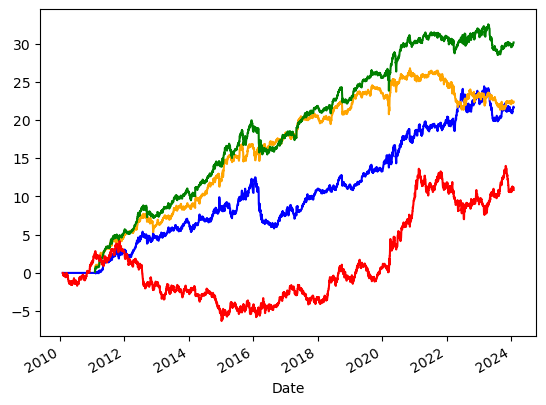

In [148]:
#     portfolio = ['AAPL','KMI','F'] #for test

# Plot the cumulative daily returns 
print("cumulative returns (daily)")
plt.figure()
(mom_rtn.cumsum()/mom_rtn.std()*0.15).plot(label='Momentum Return', color='blue') 
(mr_rtn.cumsum()/mr_rtn.std()*0.15).plot(label='Mean Reversion Return', color='orange')
(both_rtn.cumsum()/both_rtn.std()*0.15).plot(label='Combined Return', color='green')

tt_sig_raw = totalret
tt_sig_mean = tt_sig_raw.mean(axis = 1)
tt_sig_std = tt_sig_raw.std(axis = 1)
tt_sig_norm = tt_sig_raw.sub(tt_sig_mean, axis = 0).div(tt_sig_std, axis = 0)

tt_rtn = (tt_sig_norm/(574-1) * rtn).sum(axis=1)
tt_rtn_mean = tt_rtn.mean() * 252     
tt_rtn_std = tt_rtn.std() * 252**0.5
tt_SR = tt_rtn_mean / tt_rtn_std
# totalret.plot()

#totalret['Total Portfolio Return'] = totalret.sum(axis=1)
(tt_rtn.cumsum()/tt_rtn.std()*0.15).plot(label='Total Portfolio Return', color='red')
# (totalret['Total Portfolio Return'].cumsum()).plot(label='Total Portfolio Return', color='red')


In [110]:
# #original

# # priceTable
# def turtle(stock_ticker):
#     stock = pdr.get_data_yahoo(stock_ticker, start='2010-02-01', end="2024-03-01")
#     if stock.empty: return pd.Series([0])
    
    
    
#     stock['high'] = stock.Close.shift(1).rolling(window=5).max() #5 day high
#     stock['low'] = stock.Close.shift(1).rolling(window=5).min() #low
#     stock['avg'] = stock.Close.shift(1).rolling(window=5).mean() #mean
    
#     #rules for entry/exit
#     stock['long_entry'] = stock.Close > stock.high
#     stock['short_entry'] = stock.Close < stock.low
#     stock['long_exit'] = stock.Close < stock.avg
#     stock['short_exit'] = stock.Close > stock.avg
    
#     stock['positions_long'] = np.nan 
#     stock.loc[stock.long_entry,'positions_long']= 1 
#     stock.loc[stock.long_exit,'positions_long']= 0 

#     stock['positions_short'] = np.nan 
#     stock.loc[stock.short_entry,'positions_short']= 0
#     stock.loc[stock.short_exit,'positions_short']= 0 

#     stock['Signal'] = stock.positions_long + stock.positions_short 

#     stock = stock.fillna(method='ffill')
#     daily_log_returns = np.log(stock.Close/stock.Close.shift(1)) 
#     daily_log_returns = daily_log_returns * stock.Signal.shift(1) 
#     print(type(daily_log_returns.cumsum()))
    
# #     stock['long_entry'] = stock.Close > stock.high
# #     stock['short_entry'] = stock.Close < stock.low
# #     stock['long_exit'] = stock.Close < stock.avg
# #     stock['short_exit'] = stock.Close > stock.avg
    
# #     stock['positions_long'] = np.nan 
# #     stock.loc[stock.long_entry,'positions_long']= 1 
# #     stock.loc[stock.long_exit,'positions_long']= 0 

# #     stock['positions_short'] = np.nan 
# #     stock.loc[stock.short_entry,'positions_short']= -1 
# #     stock.loc[stock.short_exit,'positions_short']= 0 

# #     stock['Signal'] = stock.positions_long + stock.positions_short 

# #     stock = stock.fillna(method='ffill')
# #     daily_log_returns = np.log(stock.Close/stock.Close.shift(1)) 
# #     daily_log_returns = daily_log_returns * stock.Signal.shift(1) 
# #     print(stock_ticker)
# #     daily_log_returns.hist(bins=50) 
# #     plt.show() 
#     return daily_log_returns.cumsum()

In [111]:
# # priceTable
# def turtle(stock_ticker):
    
#     stock = pdr.get_data_yahoo(stock_ticker, start='2010-02-01', end="2024-03-01")
#     stock['high'] = stock.Close.shift(1).rolling(window=5).max().fillna(method='bfill')
#     stock['low'] = stock.Close.shift(1).rolling(window=5).min().fillna(method='bfill')
#     stock['avg'] = stock.Close.shift(1).rolling(window=5).mean().fillna(method='bfill')

#     # Define the entry and exit signals from the beginning
#     stock['long_entry'] = stock.Close > stock.high
#     stock['short_entry'] = stock.Close < stock.low
#     stock['long_exit'] = stock.Close < stock.avg
#     stock['short_exit'] = stock.Close > stock.avg

#     # Initialize positions based on the signals
#     stock['positions_long'] = 0
#     stock.loc[stock.long_entry, 'positions_long'] = 1
#     stock.loc[stock.long_exit, 'positions_long'] = 0

#     stock['positions_short'] = 0
#     stock.loc[stock.short_entry, 'positions_short'] = -0.2
#     stock.loc[stock.short_exit, 'positions_short'] = 0

#     # Combine long and short positions into a single signal
#     stock['Signal'] = stock['positions_long'] + stock.positions_short
#     stock['Signal'] = stock['Signal'].ffill().fillna(0)

#     # Calculate the daily log returns
#     daily_log_returns = np.log(stock.Close / stock.Close.shift(1))
#     daily_log_returns = daily_log_returns * stock['Signal'].shift(1)

#     # Calculate cumulative returns from the start of trading activity
#     cumulative_log_returns = daily_log_returns.cumsum()

#     return cumulative_log_returns
    
    
    
    
# #     stock = pdr.get_data_yahoo(stock_ticker, start='2010-02-01', end="2024-03-01")
# #     stock['high'] = stock.Close.shift(1).rolling(window=5).max() #5 day high
# #     stock['low'] = stock.Close.shift(1).rolling(window=5).min() #low
# #     stock['avg'] = stock.Close.shift(1).rolling(window=5).mean() #mean
    
# #     #rules for entry/exit
# #     stock['long_entry'] = stock.Close > stock.high
# #     stock['short_entry'] = stock.Close < stock.low
# #     stock['long_exit'] = stock.Close < stock.avg
# #     stock['short_exit'] = stock.Close > stock.avg
    
# #     stock['positions_long'] = np.nan 
# #     stock.loc[stock.long_entry,'positions_long']= 1 
# #     stock.loc[stock.long_exit,'positions_long']= 0 

# #     stock['positions_short'] = np.nan 
# #     stock.loc[stock.short_entry,'positions_short']= 0 
# #     stock.loc[stock.short_exit,'positions_short']= 0 
    

    
    
    
    
# #      # Calculate positions only after the first entry point to avoid leading NaN values
# #     first_long_entry = stock['long_entry'].idxmax()
# #     first_short_entry = stock['short_entry'].idxmax()
# #     start_date = min(first_long_entry, first_short_entry)
    
# #     # Trim the stock DataFrame to start from the first entry
# #     trading_stock = stock.loc[start_date:].copy()

# #     # Forward-fill the NaN values in the positions
# # #     stock['positions_long'] = stock['positions_long'].ffill().fillna(0)
# # #     stock['positions_short'] = stock['positions_short'].ffill().fillna(0)
    
# #     trading_stock.loc[:, 'positions_long'] = trading_stock['positions_long'].ffill().fillna(0)
# #     trading_stock.loc[:, 'positions_short'] = trading_stock['positions_short'].ffill().fillna(0)

# #     # Signal should be the sum of the long and short positions
# #     trading_stock.loc[:, 'Signal'] = trading_stock['positions_long'] + trading_stock['positions_short']

# #     # Calculate the daily log returns
# #     daily_log_returns = np.log(trading_stock.Close / trading_stock.Close.shift(1)) 
# #     daily_log_returns = daily_log_returns * trading_stock['Signal'].shift(1)

# #     # Calculate cumulative returns from the start of trading activity
# #     cumulative_log_returns = daily_log_returns.cumsum()

# #     return cumulative_log_returns
    
    
    

# #     stock['Signal'] = stock.positions_long + stock.positions_short 

# # #     stock = stock.fillna(method='ffill')
# # #     daily_log_returns = np.log(stock.Close/stock.Close.shift(1)) 
# # #     daily_log_returns = daily_log_returns * stock.Signal.shift(1) 
# # #     return daily_log_returns.cumsum()
# #     daily_log_returns = np.log(stock.Close/stock.Close.shift(1))
# #     daily_log_returns = daily_log_returns * stock.Signal.shift(1)
# #     # Cumulative sum of the daily log returns gives the cumulative log return
# #     cum_log_returns = daily_log_returns.cumsum()

# #     # Remove the flat part by dropping zeros or NaN values
# #     # This will remove any flat part at the beginning of the cumulative log returns where the signal has not started trading yet

# #     cum_log_returns = cum_log_returns[cum_log_returns != 0].dropna()

    

# #     return cum_log_returns

In [112]:
# print
# sys = TurtleSystem(tickers, init_account_size=1E4, start='2010-01-01')
# sys.run()

In [113]:
# from copy import deepcopy, copy
# import backtrader as bt


In [114]:
# #buy signal: high of last 20 days
# #sell signal: low of last 10 days

# class TurtleStrategy(bt.Strategy):
#     params = (('long_period', 20), ('short_period', 10),)

#     def __init__(self):
#         self.order = None
#         self.buy_price = None
#         self.buy_comm = None

        
        
        
        
#         self.high = bt.indicators.Highest(self.data.high, period=self.p.long_period)
#         self.low = bt.indicators.Lowest(self.data.low, period=self.p.short_period)

#     def notify_order(self, order):
#         if order.status in [order.Submitted, order.Accepted]:
#             return

#         if order.status in [order.Completed]:
#             if order.isbuy():
#                 self.log('BUY EXECUTED, %.2f' % order.executed.price)
#             elif order.issell():
#                 self.log('SELL EXECUTED, %.2f' % order.executed.price)

#         self.order = None
    
    
    
    
#     #called for every new data point (daily, in this case) and contains the strategy logic for when to buy or sell based on the close price crossing the high or low threshold
#     def next(self):
#         if self.order:
#             return

#         if not self.position:
#             if self.data.close > self.high:
#                 self.log('BUY CREATE, %.2f' % self.data.close[0])
#                 self.order = self.buy()

#         else:
#             if self.data.close < self.low:
#                 self.log('SELL CREATE, %.2f' % self.data.close[0])
#                 self.order = self.sell()

                
                
#     #logs information etc
#     def log(self, txt, dt=None):
#         dt = dt or self.datas[0].datetime.date(0)
#         print(f'{dt.isoformat()}, {txt}')


# def run_backtest():
#     cerebro = bt.Cerebro()

#     data = yfinance.download('RRRP3.SA','2010-01-01','2024-02-01')
#     datafeed = bt.feeds.PandasData(dataname=data)
#     cerebro.adddata(datafeed)

#     cerebro.addstrategy(TurtleStrategy)
#     cerebro.broker.setcash(100000.0)

#     print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
#     cerebro.run()
# #     print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    
# #     print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
# #     cerebro.plot(style='candlestick')
#     cerebro.plot()
    
#     plt.figure()
#     (mom_rtn.cumsum()/mom_rtn.std()*0.15).plot(label='Momentum Return', color='blue') 
#     (mr_rtn.cumsum()/mr_rtn.std()*0.15).plot(label='Mean Reversion Return', color='orange')
#     (both_rtn.cumsum()/both_rtn.std()*0.15).plot(label='Combined Return', color='green')


# if __name__ == '__main__':
#     run_backtest()

In [ ]:
# class TurtleStrategy(bt.Strategy):
#     params = (('long_period', 20), ('short_period', 10),)

#     def __init__(self):
#         self.order = None
#         self.buy_price = None
#         self.buy_comm = None

#         self.high = bt.indicators.Highest(self.data.high, period=self.p.long_period)
#         self.low = bt.indicators.Lowest(self.data.low, period=self.p.short_period)
#         self.tr = bt.indicators.TrueRange(self.data)
#         self.n = bt.indicators.SimpleMovingAverage(self.tr, period=self.p.long_period)

#     def notify_order(self, order):
#         if order.status in [order.Submitted, order.Accepted]:
#             return

#         if order.status in [order.Completed]:
#             if order.isbuy():
#                 self.log('BUY EXECUTED, %.2f' % order.executed.price)
#             elif order.issell():
#                 self.log('SELL EXECUTED, %.2f' % order.executed.price)

#         self.order = None

#     def next(self):
#         if self.order:
#             return

#         size = (self.broker.getvalue() * 0.01) / self.n[0]

#         if not self.position:
#             if self.data.close > self.high:
#                 self.log('BUY CREATE, %.2f' % self.data.close[0])
#                 self.order = self.buy(size=size)

#         else:
#             if self.data.close < self.low:
#                 self.log('SELL CREATE, %.2f' % self.data.close[0])
#                 self.order = self.sell(size=size)

#     def log(self, txt, dt=None):
#         dt = dt or self.datas[0].datetime.date(0)
#         print(f'{dt.isoformat()}, {txt}')

In [ ]:
# class TurtleStrategy(bt.Strategy):
#     params = (('long_period', 20), ('short_period', 10),)

#     def __init__(self):
#         self.order = None
#         self.buy_price = None
#         self.buy_comm = None

#         self.high = bt.indicators.Highest(self.data.high, period=self.p.long_period)
#         self.low = bt.indicators.Lowest(self.data.low, period=self.p.short_period)

#     def notify_order(self, order):
#         if order.status in [order.Submitted, order.Accepted]:
#             return

#         if order.status in [order.Completed]:
#             if order.isbuy():
#                 self.log('BUY EXECUTED, %.2f' % order.executed.price)
#             elif order.issell():
#                 self.log('SELL EXECUTED, %.2f' % order.executed.price)

#         self.order = None

#     def next(self):
#         if self.order:
#             return

#         if not self.position:
#             if self.data.close > self.high:
#                 self.log('BUY CREATE, %.2f' % self.data.close[0])
#                 self.order = self.buy()

#         else:
#             if self.data.close < self.low:
#                 self.log('SELL CREATE, %.2f' % self.data.close[0])
#                 self.order = self.sell()

#     def log(self, txt, dt=None):
#         dt = dt or self.datas[0].datetime.date(0)
#         print(f'{dt.isoformat()}, {txt}')


# def run_backtest():
#     cerebro = bt.Cerebro()

#     data = yfinance.download('AAPL','2000-01-01','2023-05-31')
#     datafeed = bt.feeds.PandasData(dataname=data)
#     cerebro.adddata(datafeed)

#     cerebro.addstrategy(TurtleStrategy)
#     cerebro.broker.setcash(100000.0)

#     print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
#     cerebro.run()
#     print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

# if __name__ == '__main__':
#     run_backtest()